In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_gbnsr6.pkl', 'rb')     
gbnsr6 = pickle.load(dbfile)
dbfile.close()

In [3]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_mmpbsa.pkl', 'rb')     
mmpbsa = pickle.load(dbfile)
dbfile.close()

In [4]:
dbfile = open('prod1.mdcrd-prod2.mdcrd-prod3.mdcrd-prod4.mdcrd_1_mmgbsa.pkl', 'rb')     
mmgbsa = pickle.load(dbfile)
dbfile.close()

In [5]:
for i in range(len(gbnsr6)):
    gbnsr6[i]['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] = gbnsr6[i]['complex_EGB'] - \
        (gbnsr6[i]['receptor_EGB'] + gbnsr6[i]['ligand_EGB'])

In [6]:
colm = 'Differences (Complex - Receptor - Ligand)_DELTA TOTAL'

# TODO
## change y axis to kcal/mol
## add igb 2

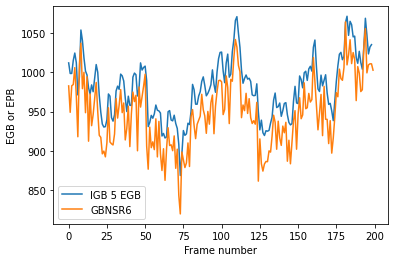

In [7]:
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa], label='IGB 5 EGB')
plt.plot([x[colm] for x in gbnsr6], label='GBNSR6')
plt.xlabel('Frame number')
plt.ylabel('EGB or EPB')
plt.legend()

In [ ]:
## RMSE
gbnsr6_rmse = []

# TODO
## RMSE
## numerical evaluation
## enlarge figures
## add total (need clarification for the point of error)
## add performance check
## add ras raf mutation
## create slides

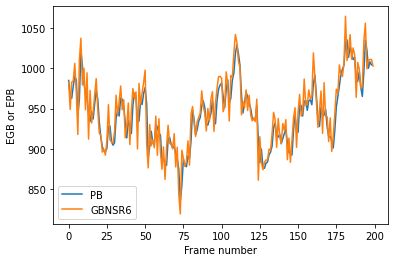

In [16]:
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='PB')
plt.plot([x[colm] for x in gbnsr6], label='GBNSR6')
plt.xlabel('Frame number')
plt.ylabel('EGB or EPB')
plt.legend()

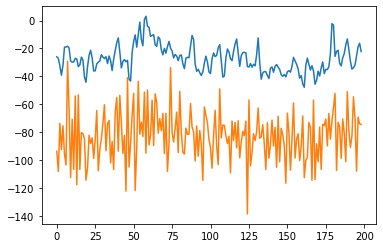

In [21]:
plt.plot([x['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] for x in mmpbsa], label='PB')
plt.plot([mmgbsa[i]['Differences (Complex - Receptor - Ligand)_DELTA TOTAL'] - \
          mmgbsa[i]['Differences (Complex - Receptor - Ligand)_EGB'] + gbnsr6[i][colm] for i in range(len(mmgbsa))], label='GBNSR6')

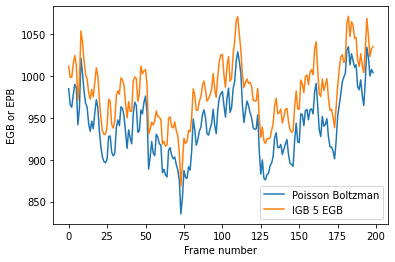

In [9]:
plt.plot([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa], label='Poisson Boltzman')
plt.plot([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa], label='IGB 5 EGB')
plt.xlabel('Frame number')
plt.ylabel('EGB or EPB')
plt.legend()

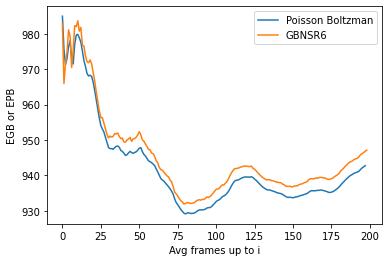

In [10]:
mmpbsa_epb = np.array([x['Differences (Complex - Receptor - Ligand)_EPB'] for x in mmpbsa])
gbnsr6_egb = np.array([x[colm] for x in gbnsr6])
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman')
plt.plot([gbnsr6_egb[:i].mean() for i in range(1, len(gbnsr6_egb))], label='GBNSR6')
plt.xlabel('Avg frames up to i')
plt.ylabel('EGB or EPB')
plt.legend()

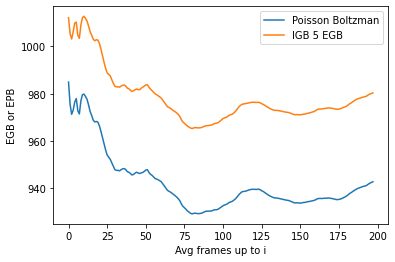

In [30]:
mmgbsa_epb = np.array([x['Differences (Complex - Receptor - Ligand)_EGB'] for x in mmgbsa])
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman')
plt.plot([mmgbsa_epb[:i].mean() for i in range(1, len(mmgbsa_epb))], label='IGB 5 EGB')
plt.xlabel('Avg frames up to i')
plt.ylabel('EGB or EPB')
plt.legend()

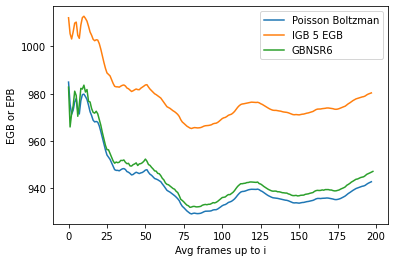

In [31]:
plt.plot([mmpbsa_epb[:i].mean() for i in range(1, len(mmpbsa_epb))], label='Poisson Boltzman')
plt.plot([mmgbsa_epb[:i].mean() for i in range(1, len(mmgbsa_epb))], label='IGB 5 EGB')
plt.plot([gbnsr6_egb[:i].mean() for i in range(1, len(gbnsr6_egb))], label='GBNSR6')
plt.xlabel('Avg frames up to i')
plt.ylabel('EGB or EPB')
plt.legend()

In [4]:
gbnsr6_acc = []
for i in range(len(gbnsr6)):
    new_dict = {}
    for kp in gbnsr6[0].keys():
        if kp == 'meta':
            continue
        k = kp
        k = k.replace('EELEC', 'EEL')
        k = k.replace('complex', 'Complex').replace('receptor', 'Receptor').replace('ligand', 'Ligand')
        new_dict[k] = np.array([gbnsr6[j][kp] for j in range(i + 1)]).mean()
    gbnsr6_acc.append(new_dict)

In [5]:
allkeys = list(gbnsr6_acc[0].keys())

In [8]:
gbnsr6_acc[0].keys()

dict_keys(['Complex_Etot', 'Complex_EKtot', 'Complex_EPtot', 'Complex_EEL', 'Complex_EGB', 'Complex_ESURF', 'Receptor_Etot', 'Receptor_EKtot', 'Receptor_EPtot', 'Receptor_EEL', 'Receptor_EGB', 'Receptor_ESURF', 'Ligand_Etot', 'Ligand_EKtot', 'Ligand_EPtot', 'Ligand_EEL', 'Ligand_EGB', 'Ligand_ESURF'])

In [6]:
plt.plot([x['mmpbsa)

[{'meta': '1',
  'Complex_EEL': -17231.1931,
  'Complex_EGB': -2855.3966,
  'Complex_ESURF': 86.814,
  'Receptor_EEL': -11572.6879,
  'Receptor_EGB': -2306.9195,
  'Receptor_ESURF': 60.8072,
  'Ligand_EEL': -4670.1313,
  'Ligand_EGB': -1560.6274,
  'Ligand_ESURF': 36.9751},
 {'meta': '2',
  'Complex_EEL': -17252.6007,
  'Complex_EGB': -2860.5595,
  'Complex_ESURF': 88.4145,
  'Receptor_EEL': -11563.971,
  'Receptor_EGB': -2313.6584,
  'Receptor_ESURF': 62.0551,
  'Ligand_EEL': -4716.6408,
  'Ligand_EGB': -1545.5737,
  'Ligand_ESURF': 36.8327},
 {'meta': '3',
  'Complex_EEL': -17274.7823,
  'Complex_EGB': -2858.6082,
  'Complex_ESURF': 90.8772,
  'Receptor_EEL': -11562.7329,
  'Receptor_EGB': -2319.6427,
  'Receptor_ESURF': 63.9453,
  'Ligand_EEL': -4734.3061,
  'Ligand_EGB': -1537.6445,
  'Ligand_ESURF': 37.0489},
 {'meta': '4',
  'Complex_EEL': -17271.5006,
  'Complex_EGB': -2877.4187,
  'Complex_ESURF': 90.8232,
  'Receptor_EEL': -11575.1331,
  'Receptor_EGB': -2327.8688,
  'Receptor

KeyError: 'Complex_Etot'

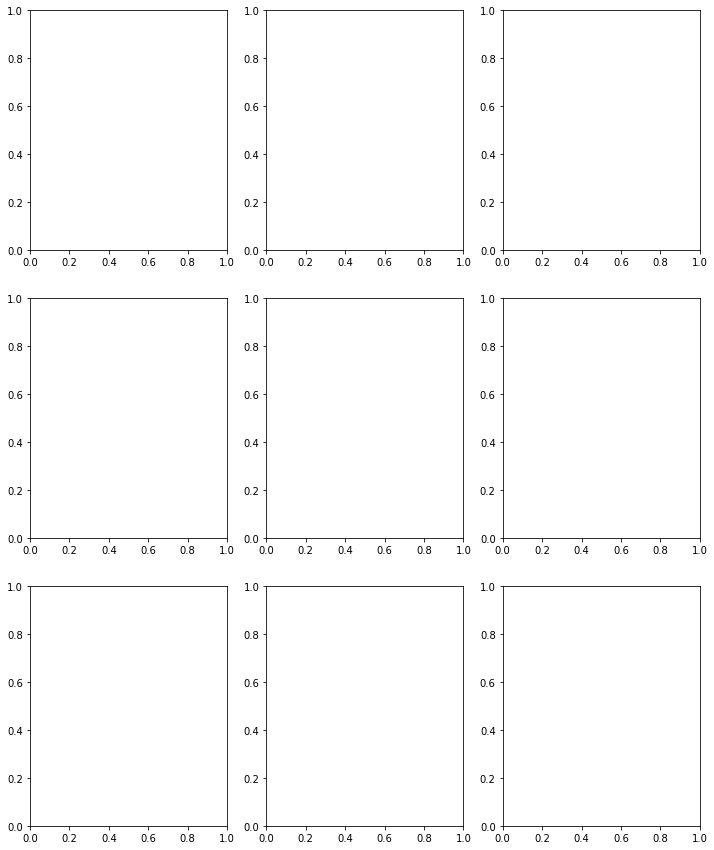

In [7]:
fig, axs = plt.subplots(3, 3, figsize=(12, 15))
n = 0
for i in range(3):
    for j in range(3):
        axs[i, j].plot([x[allkeys[n]] for x in mmpbsa], 'r^')
        axs[i, j].plot([x[allkeys[n]] for x in gbnsr6_acc], 'b^')
        axs[i, j].set_title(allkeys[n])
        n += 1

In [8]:
counter_con = 0
for k in allkeys:
    for i in range(len(mmpbsa) - 1):
        diff_mm = mmpbsa[i + 1][k] - mmpbsa[i][k]
        diff_gb = gbnsr6_acc[i + 1][k] - gbnsr6_acc[i][k]
        if diff_mm/np.abs(diff_mm) != diff_gb/np.abs(diff_gb):
            counter_con += 1
            print('Methods have contradiction between frames %d and %d in %s'%(i, i + 1, k))

Methods have contradiction between frames 0 and 1 in Complex_EEL
Methods have contradiction between frames 1 and 2 in Complex_EEL
Methods have contradiction between frames 2 and 3 in Complex_EEL
Methods have contradiction between frames 3 and 4 in Complex_EEL
Methods have contradiction between frames 4 and 5 in Complex_EEL
Methods have contradiction between frames 6 and 7 in Complex_EEL
Methods have contradiction between frames 8 and 9 in Complex_EEL
Methods have contradiction between frames 9 and 10 in Complex_EEL
Methods have contradiction between frames 10 and 11 in Complex_EEL
Methods have contradiction between frames 11 and 12 in Complex_EEL
Methods have contradiction between frames 12 and 13 in Complex_EEL
Methods have contradiction between frames 14 and 15 in Complex_EEL
Methods have contradiction between frames 0 and 1 in Complex_EGB
Methods have contradiction between frames 2 and 3 in Complex_EGB
Methods have contradiction between frames 3 and 4 in Complex_EGB
Methods have con

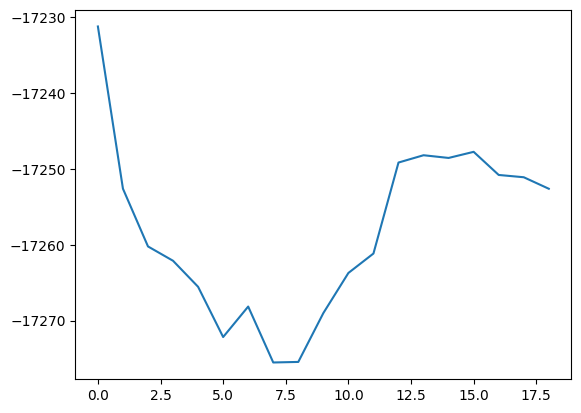

In [9]:
plt.plot([x['Complex_EEL'] for x in mmpbsa])